<a href="https://colab.research.google.com/github/parikshithrao/ML/blob/master/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv("/content/insurance.csv")


In [74]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
data.shape

(1338, 7)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [77]:
columns = data.columns
for column in columns:
  if data[column].dtype=="object":
    print("Unique values in "+ column + " is", data[column].unique())

Unique values in sex is ['female' 'male']
Unique values in smoker is ['yes' 'no']
Unique values in region is ['southwest' 'southeast' 'northwest' 'northeast']


In [78]:

data.drop_duplicates(subset=None, keep='first', inplace=True)
len(data)

1337

In [79]:
data['smoker'].replace({'yes' : 0, 'no' : 1},inplace =True)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 83.6+ KB


In [81]:
data['sex'].replace({'female' : 0, 'male' : 1},inplace =True)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


In [83]:
data = pd.get_dummies(data,columns=['region'],drop_first=True)

In [84]:
data.corr()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.019814,0.109344,0.041536,0.025587,0.298308,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.046397,0.017848,-0.076596,0.058044,-0.012482,0.017578,-0.003767
bmi,0.109344,0.046397,1.000000,0.012755,-0.003746,0.198401,-0.136138,0.270057,-0.006211
children,0.041536,0.017848,0.012755,1.000000,-0.007331,0.067389,0.026044,-0.023492,0.021538
smoker,0.025587,-0.076596,-0.003746,-0.007331,1.000000,-0.787234,0.036321,-0.068282,0.037168
charges,0.298308,0.058044,0.198401,0.067389,-0.787234,1.000000,-0.038695,0.073578,-0.043637
region_northwest,0.001495,-0.012482,-0.136138,0.026044,0.036321,-0.038695,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.017578,0.270057,-0.023492,-0.068282,0.073578,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.003767,-0.006211,0.021538,0.037168,-0.043637,-0.320493,-0.346614,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


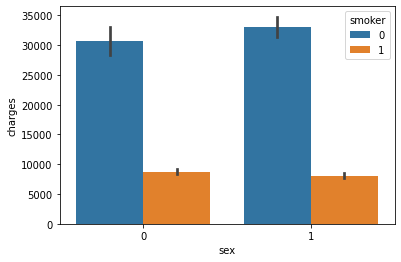

In [85]:
sns.barplot('sex','charges',hue='smoker',data=data)

In [86]:
sns.barplot('region','charges',hue='children',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

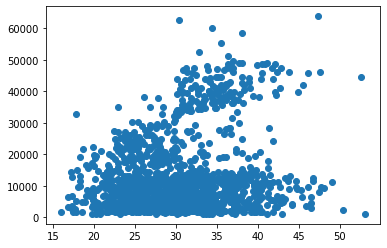

In [87]:
plt.scatter(x = 'bmi', y = 'charges',data = data)

In [88]:
data.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,13279.121487,0.242334,0.272251,0.243082
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656,0.428655,0.445285,0.429104
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.290000,0.000000,1.000000,4746.344000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,9386.161300,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,1.000000,16657.717450,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


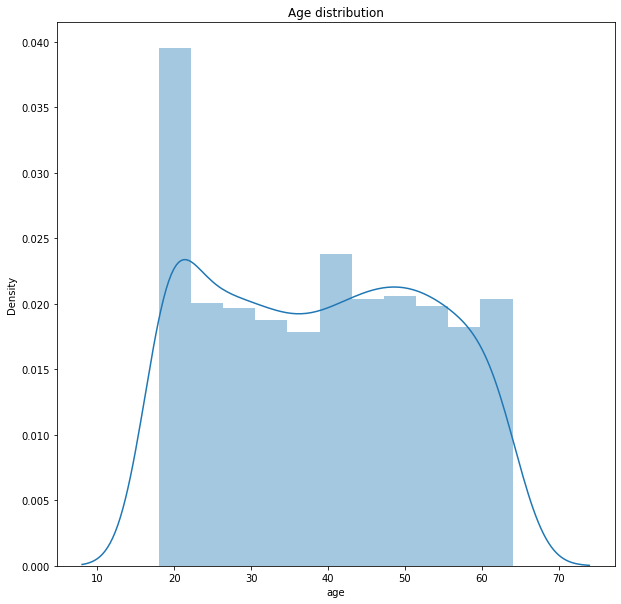

In [89]:
plt.figure(figsize=(10,10))
sns.distplot(data['age'])
plt.title("Age distribution")
plt.show()

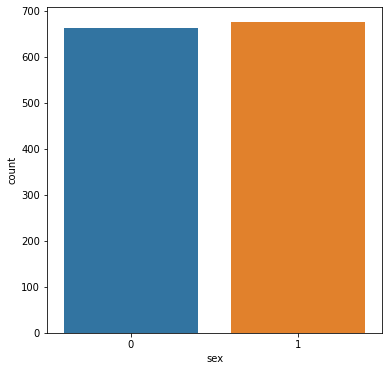

In [90]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


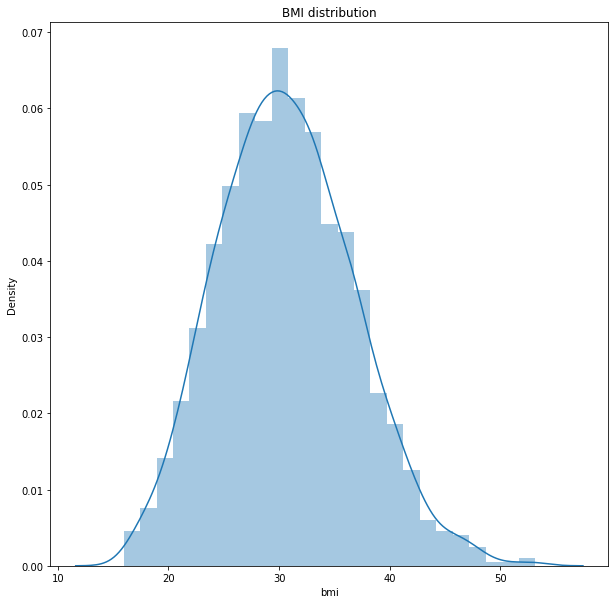

In [91]:
plt.figure(figsize=(10,10))
sns.distplot(data['bmi'])
plt.title("BMI distribution")
plt.show()

In [92]:
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


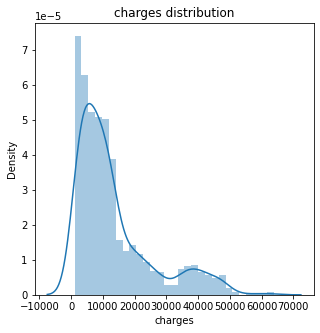

In [93]:
plt.figure(figsize = (5,5))
sns.distplot(data['charges'])
plt.title("charges distribution")
plt.show()

In [94]:
data.rename(columns = {'region_northwest' : 'region0', 'region_southeast' : 'region1', 'region_southwest' : 'region2'},inplace=True)

In [95]:
data.head()

,age,sex,bmi,children,smoker,charges,region0,region1,region2
0,19,0,27.900,0,0,16884.92400,0,0,1
1,18,1,33.770,1,1,1725.55230,0,1,0
2,28,1,33.000,3,1,4449.46200,0,1,0
3,33,1,22.705,0,1,21984.47061,1,0,0
4,32,1,28.880,0,1,3866.85520,1,0,0


In [96]:
X = data.drop(columns = 'charges',axis =1)

In [97]:
y = data['charges']

In [98]:
print(X,y)

      age  sex     bmi  children  smoker  region0  region1  region2
0      19    0  27.900         0       0        0        0        1
1      18    1  33.770         1       1        0        1        0
2      28    1  33.000         3       1        0        1        0
3      33    1  22.705         0       1        1        0        0
4      32    1  28.880         0       1        1        0        0
...   ...  ...     ...       ...     ...      ...      ...      ...
1333   50    1  30.970         3       1        1        0        0
1334   18    0  31.920         0       1        0        0        0
1335   18    0  36.850         0       1        0        1        0
1336   21    0  25.800         0       1        0        0        1
1337   61    0  29.070         0       0        1        0        0

[1337 rows x 8 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [101]:
print(X_train)

      age  sex     bmi  children  smoker  region0  region1  region2
613    34    0  19.000         3       1        0        0        0
1093   22    0  30.400         0       0        1        0        0
1252   20    1  27.300         0       0        0        0        1
556    46    1  33.440         1       1        0        0        0
1172   56    0  41.910         0       1        0        1        0
...   ...  ...     ...       ...     ...      ...      ...      ...
466    60    0  28.700         1       1        0        0        1
299    48    0  28.880         1       1        1        0        0
493    61    1  43.400         0       1        0        0        1
527    51    0  25.800         1       1        0        0        1
1193   48    0  36.575         0       1        1        0        0

[1002 rows x 8 columns]


In [102]:
print(y_train)

613      6753.03800
1093    33907.54800
1252    16232.84700
556      8334.58960
1172    11093.62290
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1193     8671.19125
Name: charges, Length: 1002, dtype: float64


In [103]:
print(X_test)

      age  sex     bmi  children  smoker  region0  region1  region2
17     23    1  23.845         0       1        0        0        0
1091   55    0  29.830         0       1        0        0        0
273    50    1  27.455         1       1        0        0        0
270    18    1  29.370         1       1        0        1        0
874    44    1  21.850         3       1        0        0        0
...   ...  ...     ...       ...     ...      ...      ...      ...
1034   61    1  38.380         0       1        1        0        0
0      19    0  27.900         0       0        0        0        1
924    43    1  23.200         0       1        0        0        1
462    62    0  38.095         2       1        0        0        0
1285   47    0  24.320         0       1        0        0        0

[335 rows x 8 columns]


In [104]:
print(y_test)

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
1034    12950.07120
0       16884.92400
924      6250.43500
462     15230.32405
1285     8534.67180
Name: charges, Length: 335, dtype: float64


In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
regressor = LinearRegression()

In [107]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:

y_pred = regressor.predict(X_test)

In [119]:
import sklearn

In [120]:
sklearn.metrics.r2_score(y_test,y_pred)

0.722217167397958

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
random = RandomForestRegressor()

In [123]:
random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
y_predr = random.predict(X_test)

In [126]:
sklearn.metrics.r2_score(y_test,y_predr)

0.8268297396420636